In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb

In [ ]:
data = pd.read_csv('/content/train_df2.csv')

In [ ]:
len(data)

11229

In [ ]:

data.drop_duplicates(inplace=True)


In [ ]:
data.head()

Longitude   Latitude          datetime  UHI Index  NVDI_Index    Band_11
0 -73.909167  40.813107  24-07-2021 15:53   1.030289    0.223391  38.431539
1 -73.909187  40.813045  24-07-2021 15:53   1.030289    0.490505  38.431539
2 -73.909215  40.812978  24-07-2021 15:53   1.023798    0.490505  37.785534
3 -73.909242  40.812908  24-07-2021 15:53   1.023798    0.490505  37.785534
4 -73.909257  40.812845  24-07-2021 15:53   1.021634    0.490505  37.785534

In [ ]:

import numpy as np

random_indices = np.random.choice(data.index, size=30, replace=False)
random_points = data.loc[random_indices]


In [ ]:
random_points

Longitude   Latitude          datetime  UHI Index  NVDI_Index  \
5210  -73.974093  40.794198  24-07-2021 15:25   0.996872    0.156327   
736   -73.924558  40.820972  24-07-2021 15:19   1.006849    0.362632   
8835  -73.962990  40.809028  24-07-2021 15:37   0.989058    0.442708   
10701 -73.949427  40.812682  24-07-2021 15:55   1.020071    0.148815   
6537  -73.953392  40.786048  24-07-2021 15:09   0.974994    0.183395   
6717  -73.967682  40.793012  24-07-2021 15:14   0.988457    0.145170   
4173  -73.913820  40.819120  24-07-2021 15:45   1.013220    0.087947   
2604  -73.926820  40.828205  24-07-2021 15:33   1.017787    0.087035   
5860  -73.954083  40.781755  24-07-2021 15:44   0.981605    0.114652   
3919  -73.912070  40.829335  24-07-2021 15:37   0.992304    0.078985   
7937  -73.885900  40.804872  24-07-2021 15:51   1.010094    0.420234   
571   -73.930447  40.813548  24-07-2021 15:14   1.036540    0.039838   
8758  -73.967528  40.805807  24-07-2021 15:34   0.982206    0.461846   
762   -73.923632  40.822442  24-07-2021 15:20   1.006849    0.086715   
3751  -73.916920  40.833742  24-07-2021 15:31   1.002401    0.102012   
1321  -73.984173  40.785807  24-07-2021 15:44   0.995309    0.588991   
2397  -73.953238  40.774362  24-07-2021 15:25   0.995309    0.293956   
2681  -73.931448  40.832425  24-07-2021 15:35   1.018028    0.071747   
9666  -73.931847  40.859440  24-07-2021 15:30   1.025721    0.448239   
4602  -73.901035  40.841570  24-07-2021 15:59   1.008411    0.187747   
10960 -73.954382  40.797728  24-07-2021 15:48   1.001800    0.747638   
9427  -73.937437  40.801872  24-07-2021 15:58   1.012739    0.225949   
5150  -73.907927  40.820660  24-07-2021 15:24   1.005887    0.329285   
6309  -73.944778  40.787357  24-07-2021 15:58   0.987135    0.486812   
10732 -73.947682  40.814427  24-07-2021 15:55   1.022355    0.282899   
10528 -73.950820  40.814493  24-07-2021 15:49   0.969825    0.309888   
8187  -73.898523  40.810512  24-07-2021 15:10   0.978240    0.104563   
881   -73.916577  40.818908  24-07-2021 15:24   1.015984    0.132894   
5946  -73.955728  40.776353  24-07-2021 15:47   0.999155    0.152180   
582   -73.930795  40.814113  24-07-2021 15:15   1.036540    0.089823   

         Band_11  
5210   36.209826  
736    39.309970  
8835   36.114122  
10701  37.286503  
6537   37.098512  
6717   36.496940  
4173   40.424245  
2604   38.780177  
5860   38.154680  
3919   39.046783  
7937   34.586267  
571    38.769923  
8758   34.094072  
762    38.103409  
3751   35.040863  
1321   30.033464  
2397   40.342213  
2681   35.943221  
9666   34.148760  
4602   40.513114  
10960  31.106722  
9427   36.978881  
5150   38.376851  
6309   35.297215  
10732  36.339711  
10528  35.341649  
8187   37.744517  
881    38.373433  
5946   37.693247  
582    38.650293

In [ ]:
# LST (Land Surface Temperature): Derived from Band 10
# NDVI (Normalized Difference Vegetation Index): (Band 5 - Band 4)/(Band 5 + Band 4)
# NDBI (Normalized Difference Built-up Index): (Band 6 - Band 5)/(Band 6 + Band 5)
# BUI (Built-up Index): NDBI - NDVI
# UI (Urban Index): (Band 7 - Band 5)/(Band 7 + Band 5)

In [ ]:
!pip install rioxarray stackstac pystac_client planetary_computer  pyodc osmnx odc-stac netCDF4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.6/99.6 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 77.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.1/155.1 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.2/194.2 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 82.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 56.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.2/35.2 MB 6.2 MB/s eta 0:00:00


In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Import common GIS tools
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import rioxarray as rio
import rasterio
from matplotlib.cm import jet,RdYlGn

# Import Planetary Computer tools
import stackstac
import pystac_client
import planetary_computer
from odc.stac import stac_load

import pandas as pd

In [ ]:
#(SWIR - NIR) / (SWIR + NIR)

data['Concetre'] = (data['Band_11'] - data['NVDI_Index']) / (data['Band_11'] + data['NVDI_Index'])

In [ ]:
data['Concetre'].corr(data['UHI Index'])

0.2812154670844519

In [ ]:
# now let use other datasets

In [ ]:
# now need to collect from other bands

In [ ]:
# LST (Land Surface Temperature): Derived from Band 10
# NDVI (Normalized Difference Vegetation Index): (Band 5 - Band 4)/(Band 5 + Band 4)
# NDBI (Normalized Difference Built-up Index): (Band 6 - Band 5)/(Band 6 + Band 5)
# BUI (Built-up Index): NDBI - NDVI
# UI (Urban Index): (Band 7 - Band 5)/(Band 7 + Band 5)

In [ ]:
lower_left = (40.75, -74.01)
upper_right = (40.88, -73.86)

In [ ]:
bounds = (lower_left[1], lower_left[0], upper_right[1], upper_right[0])

In [ ]:
time_window = "2021-06-01/2021-09-01"

In [ ]:
stac = pystac_client.Client.open("https://planetarycomputer.microsoft.com/api/stac/v1")

search = stac.search(
    bbox=bounds,
    datetime=time_window,
    collections=["landsat-c2-l2"],
    query={"eo:cloud_cover": {"lt": 50},"platform": {"in": ["landsat-8"]}},
)

In [ ]:
items = list(search.get_items())
print('This is the number of scenes that touch our region:',len(items))

This is the number of scenes that touch our region: 8


In [ ]:
resolution = 10# meters per pixel
scale = resolution / 111320.0

In [ ]:
ssc = stac_load(
    items,
    bands=["swir16", "swir22", "coastal"],
    crs="EPSG:4326", # Latitude-Longitude
    resolution=scale, # Degrees
    chunks={"x": 2048, "y": 2048},
    dtype="uint16",
    patch_url=planetary_computer.sign,
    bbox=bounds
)

In [ ]:
ssc_ = ssc.isel(time=2)

In [ ]:
filename = 'ssc.tiff'

In [ ]:
height = ssc.dims["latitude"]
width = ssc.dims["longitude"]

In [ ]:
gt = rasterio.transform.from_bounds(lower_left[1],lower_left[0],upper_right[1],upper_right[0],width,height)
ssc.rio.write_crs("epsg:4326", inplace=True)
ssc.rio.write_transform(transform=gt, inplace=True)

<xarray.Dataset> Size: 116MB
Dimensions:      (latitude: 1448, longitude: 1671, time: 8)
Coordinates:
  * latitude     (latitude) float64 12kB 40.88 40.88 40.88 ... 40.75 40.75 40.75
  * longitude    (longitude) float64 13kB -74.01 -74.01 -74.01 ... -73.86 -73.86
  * time         (time) datetime64[ns] 64B 2021-06-07T15:39:15.904901 ... 202...
    spatial_ref  int64 8B 0
Data variables:
    swir16       (time, latitude, longitude) uint16 39MB dask.array<chunksize=(1, 1448, 1671), meta=np.ndarray>
    swir22       (time, latitude, longitude) uint16 39MB dask.array<chunksize=(1, 1448, 1671), meta=np.ndarray>
    coastal      (time, latitude, longitude) uint16 39MB dask.array<chunksize=(1, 1448, 1671), meta=np.ndarray>

In [ ]:
ssc

<xarray.Dataset> Size: 116MB
Dimensions:      (latitude: 1448, longitude: 1671, time: 8)
Coordinates:
  * latitude     (latitude) float64 12kB 40.88 40.88 40.88 ... 40.75 40.75 40.75
  * longitude    (longitude) float64 13kB -74.01 -74.01 -74.01 ... -73.86 -73.86
  * time         (time) datetime64[ns] 64B 2021-06-07T15:39:15.904901 ... 202...
    spatial_ref  int64 8B 0
Data variables:
    swir16       (time, latitude, longitude) uint16 39MB dask.array<chunksize=(1, 1448, 1671), meta=np.ndarray>
    swir22       (time, latitude, longitude) uint16 39MB dask.array<chunksize=(1, 1448, 1671), meta=np.ndarray>
    coastal      (time, latitude, longitude) uint16 39MB dask.array<chunksize=(1, 1448, 1671), meta=np.ndarray>

In [ ]:
# ["swir16", "swir22", "coastal"],

In [ ]:
filename_ = 'coastal'

In [ ]:
with rasterio.open(filename_,'w',driver='GTiff',width=width,height=height,
                   crs='epsg:4326',transform=gt,count=1,compress='lzw',dtype='float64') as dst:
    dst.write(ssc.isel(time=2).coastal, 1)
    dst.close()

In [ ]:
other =  stac_load(
    items,
    bands=["drad", "emis", "emsd", 'trad'],
    crs="EPSG:4326", # Latitude-Longitude
    resolution=scale, # Degrees
    chunks={"x": 2048, "y": 2048},
    dtype="uint16",
    patch_url=planetary_computer.sign,
    bbox=bounds
)

In [ ]:
drad_emis_emsd_trad = other.isel(time=2)

In [ ]:
height = drad_emis_emsd_trad.dims["latitude"]
width = drad_emis_emsd_trad.dims["longitude"]

In [ ]:
drad = drad_emis_emsd_trad['drad']

In [ ]:
filename = 'trad.tiff'

# drad_emis_emsd_trad.rio.to_raster(filename)

In [ ]:
drad = drad_emis_emsd_trad['drad']

In [ ]:
gt = rasterio.transform.from_bounds(lower_left[1],lower_left[0],upper_right[1],upper_right[0],width,height)
other.rio.write_crs("epsg:4326", inplace=True)
other.rio.write_transform(transform=gt, inplace=True)

<xarray.Dataset> Size: 155MB
Dimensions:      (latitude: 1448, longitude: 1671, time: 8)
Coordinates:
  * latitude     (latitude) float64 12kB 40.88 40.88 40.88 ... 40.75 40.75 40.75
  * longitude    (longitude) float64 13kB -74.01 -74.01 -74.01 ... -73.86 -73.86
  * time         (time) datetime64[ns] 64B 2021-06-07T15:39:15.904901 ... 202...
    spatial_ref  int64 8B 0
Data variables:
    drad         (time, latitude, longitude) uint16 39MB dask.array<chunksize=(1, 1448, 1671), meta=np.ndarray>
    emis         (time, latitude, longitude) uint16 39MB dask.array<chunksize=(1, 1448, 1671), meta=np.ndarray>
    emsd         (time, latitude, longitude) uint16 39MB dask.array<chunksize=(1, 1448, 1671), meta=np.ndarray>
    trad         (time, latitude, longitude) uint16 39MB dask.array<chunksize=(1, 1448, 1671), meta=np.ndarray>

In [ ]:
train_df = pd.read_csv('/content/train_df2.csv')

In [ ]:
train_df.head()

Longitude   Latitude          datetime  UHI Index  NVDI_Index    Band_11
0 -73.909167  40.813107  24-07-2021 15:53   1.030289    0.223391  38.431539
1 -73.909187  40.813045  24-07-2021 15:53   1.030289    0.490505  38.431539
2 -73.909215  40.812978  24-07-2021 15:53   1.023798    0.490505  37.785534
3 -73.909242  40.812908  24-07-2021 15:53   1.023798    0.490505  37.785534
4 -73.909257  40.812845  24-07-2021 15:53   1.021634    0.490505  37.785534

In [ ]:
drad.sel(longitude=-73.909167, latitude= 40.813107, method="nearest").values.item()

545

In [ ]:
with rasterio.open(filename,'w',driver='GTiff',width=width,height=height,
                   crs='epsg:4326',transform=gt,count=1,compress='lzw',dtype='float64') as dst:
    dst.write(other.isel(time=2).trad,1)
    dst.close()

In [ ]:
# count = [0]
# import numpy as np
# import rioxarray

# def values(latitude , longitude , data , count ):
#   #  print(high_thermal)
#     try:
#         value = data.sel(longitude=longitude, latitude=latitude, method="nearest").values.item()
#         return value

#     except (KeyError, ValueError):
#         count[0] += 1
#         return np.nan

# train_df['drad_'] = train_df.apply(lambda row: values(row['Latitude'], row['Longitude'],  drad , count), axis=1)
# print(count)

In [ ]:
rgb

<xarray.Dataset> Size: 15MB
Dimensions:      (latitude: 1448, longitude: 1671)
Coordinates:
  * latitude     (latitude) float64 12kB 40.88 40.88 40.88 ... 40.75 40.75 40.75
  * longitude    (longitude) float64 13kB -74.01 -74.01 -74.01 ... -73.86 -73.86
    spatial_ref  int32 4B 4326
    time         datetime64[ns] 8B 2021-06-07T15:39:15.904901
Data variables:
    red          (latitude, longitude) uint16 5MB dask.array<chunksize=(1448, 1671), meta=np.ndarray>
    green        (latitude, longitude) uint16 5MB dask.array<chunksize=(1448, 1671), meta=np.ndarray>
    blue         (latitude, longitude) uint16 5MB dask.array<chunksize=(1448, 1671), meta=np.ndarray>

In [ ]:
# consider from other dataset

In [ ]:
tiff_path = "/content/drad_emis_emsd_trad.tiff"

with rasterio.open(tiff_path) as src1:
    drad = src1.read(1)  # Band [B01]

In [ ]:
with rasterio.open('/content/emis.tiff') as src1:
    emis = src1.read(1)

In [ ]:
with rasterio.open('/content/emsd.tiff') as src1:
    emsd = src1.read(1)

In [ ]:
with rasterio.open('/content/trad.tiff') as src1:
    trad = src1.read(1)

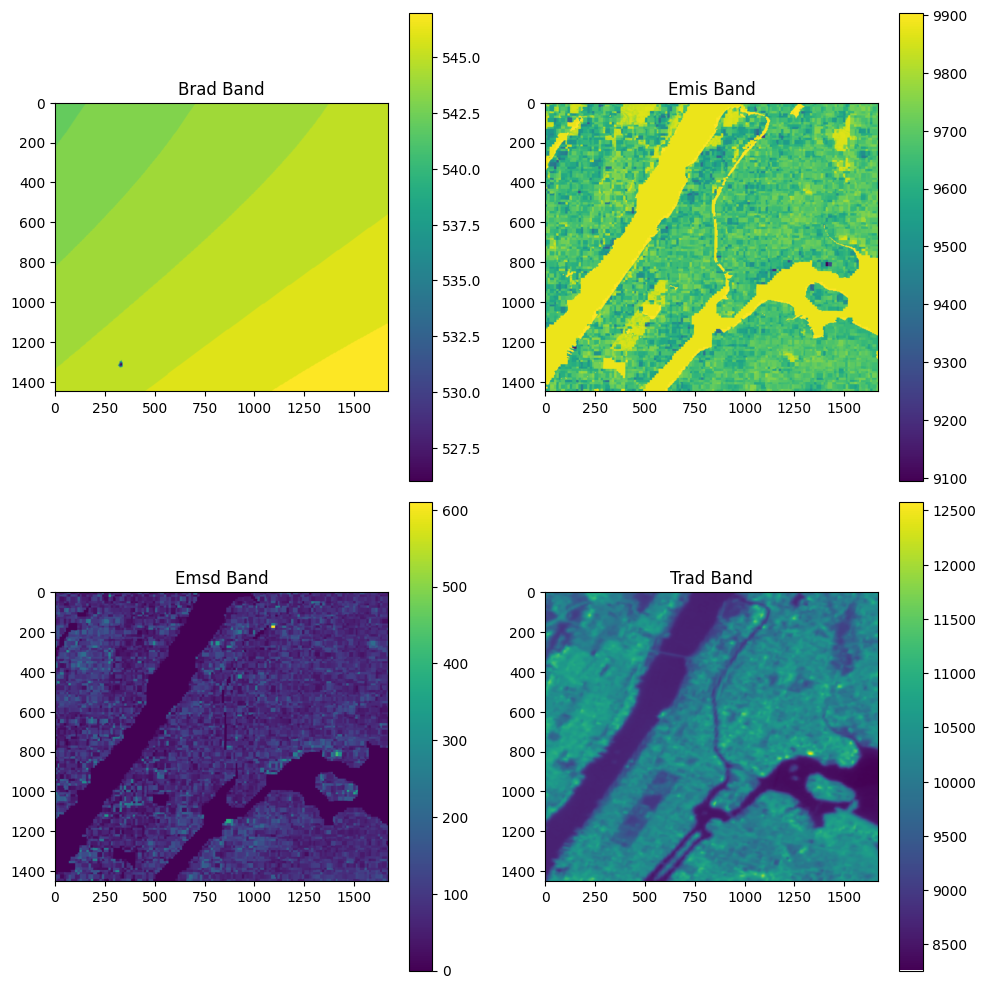

In [ ]:

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()

im1 = axes[0].imshow(drad, cmap='viridis')
axes[0].set_title('Brad Band')
fig.colorbar(im1, ax=axes[0])

im2 = axes[1].imshow(emis, cmap='viridis')
axes[1].set_title('Emis Band')
fig.colorbar(im2, ax=axes[1])

im3 = axes[2].imshow(emsd, cmap='viridis')
axes[2].set_title('Emsd Band')
fig.colorbar(im3, ax=axes[2])

im4 = axes[3].imshow(trad, cmap='viridis')
axes[3].set_title('Trad Band')
fig.colorbar(im4, ax=axes[3])

plt.tight_layout()
plt.show()

In [ ]:
with rasterio.open('/content/coastal') as src1:
    coastal = src1.read(1)

In [ ]:
with rasterio.open('/content/swir16') as src1:
    swir16 = src1.read(1)

In [ ]:
with rasterio.open('/content/swir22') as src1:
    swir22 = src1.read(1)

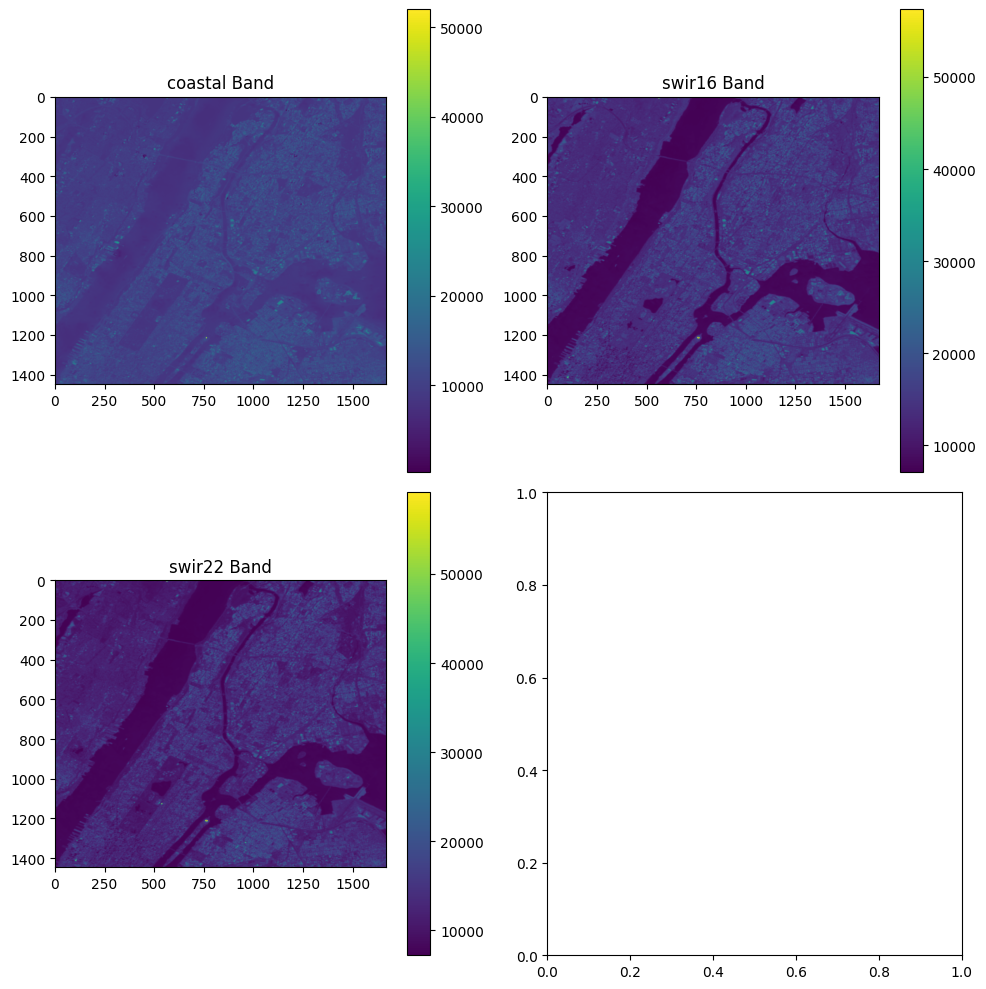

In [ ]:

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()

im1 = axes[0].imshow(coastal, cmap='viridis')
axes[0].set_title('coastal Band')
fig.colorbar(im1, ax=axes[0])

im2 = axes[1].imshow(swir16, cmap='viridis')
axes[1].set_title('swir16 Band')
fig.colorbar(im2, ax=axes[1])

im3 = axes[2].imshow(swir22, cmap='viridis')
axes[2].set_title('swir22 Band')
fig.colorbar(im3, ax=axes[2])

plt.tight_layout()
plt.show()

In [ ]:
import rioxarray as rxr

In [ ]:
train_df = pd.read_csv('/content/train_df2.csv')

In [ ]:
# count = [0]
import numpy as np
import rioxarray

def addvalues(filename, name):

  data = rxr.open_rasterio(filename)
  count = [0]
  def values(latitude , longitude , count ):
    try:
        value = data.sel(x=longitude, y =latitude, method="nearest").values.item()
        return value

    except (KeyError, ValueError):
        count[0] += 1
        return np.nan

  train_df[name] = train_df.apply(lambda row: values(row['Latitude'], row['Longitude'],  count), axis=1)
  print(count)



In [ ]:
addvalues('/content/emis.tiff', 'emis')

[0]


In [ ]:
addvalues('/content/emsd.tiff', 'emsd')
addvalues('/content/trad.tiff', 'trad')
addvalues('/content/drad_emis_emsd_trad.tiff', 'drad')
addvalues('/content/coastal', 'coastal')
addvalues('/content/swir16', 'swir16')
addvalues('/content/swir22', 'swir22')

[0]
[0]
[0]
[0]
[0]
[0]


In [ ]:
train_df.head()

Longitude   Latitude          datetime  UHI Index  NVDI_Index    Band_11  \
0 -73.909167  40.813107  24-07-2021 15:53   1.030289    0.223391  38.431539   
1 -73.909187  40.813045  24-07-2021 15:53   1.030289    0.490505  38.431539   
2 -73.909215  40.812978  24-07-2021 15:53   1.023798    0.490505  37.785534   
3 -73.909242  40.812908  24-07-2021 15:53   1.023798    0.490505  37.785534   
4 -73.909257  40.812845  24-07-2021 15:53   1.021634    0.490505  37.785534   

     emis   emsd     trad   drad  coastal   swir16   swir22  
0  9689.0   82.0  10445.0  545.0  10291.0  13513.0  12597.0  
1  9689.0   82.0  10445.0  545.0  10291.0  13513.0  12597.0  
2  9729.0  114.0  10398.0  545.0   8700.0  12236.0  10743.0  
3  9729.0  114.0  10398.0  545.0   8700.0  12236.0  10743.0  
4  9729.0  114.0  10398.0  545.0   8700.0  12236.0  10743.0

In [ ]:
train_df.to_csv('train_df3.csv')

In [ ]:
train_df.columns

Index(['Longitude', 'Latitude', 'datetime', 'UHI Index', 'NVDI_Index',
       'Band_11', 'emis', 'emsd', 'trad', 'drad', 'coastal', 'swir16',
       'swir22'],
      dtype='object')

In [ ]:
# SPLIT THE DATA 70: 30 RATIO RANDOM
WEATHER = pd.ExcelFile(r'/content/NY_Mesonet_Weather.xlsx')

In [ ]:
WEATHER

In [ ]:
# prompt: FINDING DUPLICATES LONGITUTE,LATITUTE PAIRs IN DATAFRAME

duplicate_rows = train_df[train_df.duplicated(subset=['Longitude', 'Latitude'], keep=False)]

print("Duplicate rows based on 'Longitude' and 'Latitude':")
duplicate_rows


Duplicate rows based on 'Longitude' and 'Latitude':


Empty DataFrame
Columns: [Longitude, Latitude, datetime, UHI Index, NVDI_Index, Band_11, emis, emsd, trad, drad, coastal, swir16, swir22]
Index: []

In [ ]:
train_df['datetime'].unique(), len(train_df['datetime'].unique())

(array(['24-07-2021 15:53', '24-07-2021 15:54', '24-07-2021 15:55',
        '24-07-2021 15:56', '24-07-2021 15:57', '24-07-2021 15:58',
        '24-07-2021 15:59', '24-07-2021 15:01', '24-07-2021 15:02',
        '24-07-2021 15:03', '24-07-2021 15:04', '24-07-2021 15:05',
        '24-07-2021 15:06', '24-07-2021 15:07', '24-07-2021 15:08',
        '24-07-2021 15:09', '24-07-2021 15:11', '24-07-2021 15:12',
        '24-07-2021 15:13', '24-07-2021 15:14', '24-07-2021 15:15',
        '24-07-2021 15:16', '24-07-2021 15:17', '24-07-2021 15:18',
        '24-07-2021 15:19', '24-07-2021 15:20', '24-07-2021 15:21',
        '24-07-2021 15:22', '24-07-2021 15:23', '24-07-2021 15:24',
        '24-07-2021 15:25', '24-07-2021 15:26', '24-07-2021 15:27',
        '24-07-2021 15:28', '24-07-2021 15:29', '24-07-2021 15:30',
        '24-07-2021 15:31', '24-07-2021 15:32', '24-07-2021 15:33',
        '24-07-2021 15:34', '24-07-2021 15:35', '24-07-2021 15:36',
        '24-07-2021 15:37', '24-07-2021 15:38', 

In [ ]:
# so total 59 are unique
WEATHER.sheet_names

['Summary', 'Terms', 'Location', 'Bronx', 'Manhattan']

In [ ]:

from sklearn.model_selection import train_test_split


X = train_df.drop(['UHI Index', 'Longitude', 'Latitude','datetime'], axis=1)
y = train_df['UHI Index']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # 70:30 split


In [ ]:
print(f"Training data shape: {X_train.shape}, {y_train.shape}")
print(f"Testing data shape: {X_test.shape}, {y_test.shape}")

Training data shape: (7860, 9), (7860,)
Testing data shape: (3369, 9), (3369,)


In [ ]:
# prompt: apply XGboost regression

import xgboost as xgb
from sklearn.metrics import mean_squared_error

xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Train the model
xgb_regressor.fit(X_train, y_train)



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Make predictions on the test set
y_pred = xgb_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 3.907335203309606e-05
Root Mean Squared Error: 0.006250868102359548


In [ ]:
# prompt: calculate r2 score

from sklearn.metrics import r2_score


y_pred = xgb_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred) # Calculate R-squared

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")


Mean Squared Error: 3.907335203309606e-05
Root Mean Squared Error: 0.006250868102359548
R-squared: 0.8520943249089441


**Building Model 2**


In [ ]:
#  rebuild the model
# PART 2
# TAKING AVERAGE OF THE SURROUNDINGS

In [ ]:
# LST (Land Surface Temperature): Derived from Band 10
# NDVI (Normalized Difference Vegetation Index): (Band 5 - Band 4)/(Band 5 + Band 4)
# NDBI (Normalized Difference Built-up Index): (Band 6 - Band 5)/(Band 6 + Band 5)
# BUI (Built-up Index): NDBI - NDVI
# UI (Urban Index): (Band 7 - Band 5)/(Band 7 + Band 5)

In [ ]:
# qaHighlight[NDVI=
# (NIR+RED)
# (NIR−RED)
# ​
#  ]

In [ ]:
train_df = pd.read_csv('/content/train_df3.csv')

In [ ]:
import numpy as np

random_indices = np.random.choice(train_df.index, size=20, replace=False)


In [ ]:
# prompt: plot the UHI_index vs ( latitute & longitute ) of using 20 random points, the value of latitute & longitute is the UHI index, and make high resolution point.

import matplotlib.pyplot as plt


random_points = train_df.loc[random_indices]

plt.figure(figsize=(10, 8), dpi=3000)  # Set figure size and DPI for high resolution
plt.scatter(random_points['Longitude'], random_points['Latitude'], c=random_points['UHI Index'], cmap='viridis', s=50)
plt.colorbar(label='UHI Index')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('UHI Index vs. Latitude and Longitude (20 Random Points)')
plt.grid(True)
plt.show()


In [ ]:
lower_left = (40.75, -74.01)
upper_right = (40.88, -73.86)
bounds = (lower_left[1], lower_left[0], upper_right[1], upper_right[0])

In [ ]:
resolution = 10# meters per pixel
scale = resolution / 111320.0

In [ ]:
time_window = "2021-06-01/2021-09-01"

In [ ]:
stac = pystac_client.Client.open("https://planetarycomputer.microsoft.com/api/stac/v1")

search = stac.search(
    bbox=bounds,
    datetime=time_window,
    collections=["landsat-c2-l2", "sentinel-3-slstr-lst-l2-netcdf"],
    query={"eo:cloud_cover": {"lt": 50},"platform": {"in": ["landsat-8"]}},
)

In [ ]:
items = list(search.get_items())
print('This is the number of scenes that touch our region:',len(items))

This is the number of scenes that touch our region: 8


In [ ]:
items

[<Item id=LC08_L2SP_014032_20210826_02_T1>,
 <Item id=LC08_L2SP_014031_20210826_02_T1>,
 <Item id=LC08_L2SP_013032_20210718_02_T1>,
 <Item id=LC08_L2SP_014032_20210623_02_T1>,
 <Item id=LC08_L2SP_014031_20210623_02_T1>,
 <Item id=LC08_L2SP_013032_20210616_02_T1>,
 <Item id=LC08_L2SP_014032_20210607_02_T1>,
 <Item id=LC08_L2SP_014031_20210607_02_T1>]

In [ ]:
# MODEL - 3

In [ ]:
import planetary_computer
import pystac_client
from IPython.display import display, Markdown

catalog = pystac_client.Client.open(
    "http://planetarycomputer.microsoft.com/api/stac/v1",
    modifier=planetary_computer.sign_inplace,
)
collection = catalog.get_collection("sentinel-3-synergy-syn-l2-netcdf")

In [ ]:
import xarray as xr
import fsspec

search = catalog.search(
    collections=["sentinel-3-synergy-syn-l2-netcdf"],
    bbox=bounds,
    datetime=time_window,

)
item = next(search.items())

In [ ]:
item

<Item id=S3A_SY_2_SYN_20210901T152336_20210901T152636_0179_076_011_2160>

In [ ]:
geo = xr.open_dataset(fsspec.open(item.assets["geolocation"].href).open())
geo

<xarray.Dataset> Size: 239MB
Dimensions:   (rows: 4091, columns: 4865)
Dimensions without coordinates: rows, columns
Data variables:
    altitude  (rows, columns) float32 80MB ...
    lat       (rows, columns) float32 80MB ...
    lon       (rows, columns) float32 80MB ...
Attributes: (12/14)
    absolute_orbit_number:  28859
    comment:                 
    contact:                eosupport@copernicus.esa.int
    creation_time:          2021-09-03T11:44:52Z
    history:                  2021-09-03T11:44:52Z: PUGCoreProcessor /data/ip...
    institution:            LN2
    ...                     ...
    references:             S3IPF PDS 006 - i1r13 - Product Data Format Speci...
    resolution:             [ 300 300 ]
    source:                 IPF-SY-2 06.21
    start_time:             2021-09-01T15:23:36.131277Z
    stop_time:              2021-09-01T15:26:36.096272Z
    title:                  SYN L2, high resolution georeferencing data

In [ ]:
geo

<xarray.Dataset> Size: 239MB
Dimensions:   (rows: 4091, columns: 4865)
Dimensions without coordinates: rows, columns
Data variables:
    altitude  (rows, columns) float32 80MB ...
    lat       (rows, columns) float32 80MB ...
    lon       (rows, columns) float32 80MB ...
Attributes: (12/14)
    absolute_orbit_number:  28859
    comment:                 
    contact:                eosupport@copernicus.esa.int
    creation_time:          2021-09-03T11:44:52Z
    history:                  2021-09-03T11:44:52Z: PUGCoreProcessor /data/ip...
    institution:            LN2
    ...                     ...
    references:             S3IPF PDS 006 - i1r13 - Product Data Format Speci...
    resolution:             [ 300 300 ]
    source:                 IPF-SY-2 06.21
    start_time:             2021-09-01T15:23:36.131277Z
    stop_time:              2021-09-01T15:26:36.096272Z
    title:                  SYN L2, high resolution georeferencing data

In [ ]:
geo.sel(lat=40.75, lon =-74.01, method="nearest").values.item()

KeyError: "'lat' is not a valid dimension or coordinate for Dataset with dimensions FrozenMappingWarningOnValuesAccess({'rows': 4091, 'columns': 4865})"

In [ ]:
(40.75, -74.01)